In [1]:
import numpy as np
from numpy import pi
from scipy.optimize import minimize
import matplotlib.pyplot as plt

import pandas as pd
import random
from qutip import *
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

# Define intial protocol

In [404]:
## Define time grid, and regularization function (for fixed boundary conditions)

t_max = 3.0
dt = 1e-2
N_t = int(t_max/dt)

time = np.linspace(0,t_max,N_t)

reg = np.sin(time*pi/(t_max))

print(N_t)

300


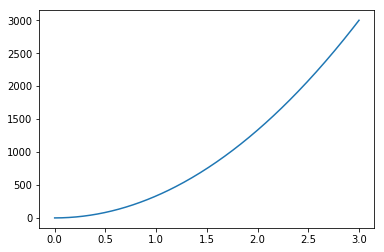

In [405]:
## Generate initial guess protocol to improve upon

alfa_max = 3000.0

a = alfa_max/t_max**2

alfa_guess = a*time**2

plt.plot(time,alfa_guess)

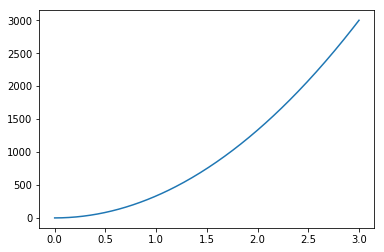

In [406]:
## Choose number of terms in the Fourier expansion and generate protocol alfa

N_c = 2
A = np.zeros(N_c) 
B = np.zeros(N_c)
w = np.zeros(N_c)
x = np.append(A,np.append(B,w))

fourier = sum([A[n]*np.cos(w[n]*time) + B[n]*np.sin(w[n]*time) for n in range (N_c)])

alfa = alfa_guess*( 1 + reg*fourier )
plt.plot(time,alfa)

In [407]:
## Generate interpolation files for the energy eigenstates as a function of alfa 

max_lvl = 4 

tab_alfa = np.loadtxt('alfa_a_0.51.txt', delimiter = ',')        
energies = np.loadtxt('Energies_a_0.51.txt', delimiter = ',')
overlap = np.loadtxt('overlap_a_0.51.txt', delimiter = ',')

overlap = np.reshape(overlap, [max_lvl,max_lvl,5001], order = 'F')

        
interp_energy = [None]*max_lvl

for n in range(max_lvl):
    f = interp1d(tab_alfa,energies[:,n], kind = 'cubic')
    interp_energy[n] = f

interp_overlap = [[0] * max_lvl for i in range(max_lvl)]

for n in range(max_lvl):
    for m in range(max_lvl):
        interp_overlap[n][m] = interp1d(tab_alfa,overlap[n,m,:], kind = 'cubic')

In [408]:
## Calculate time dependence of energy for given protocol

E = []

for t in range(N_t):
    E.append([interp_energy[n](alfa[t]) for n in range(max_lvl)])
    
E = np.array(E)
E.shape

(300, 4)

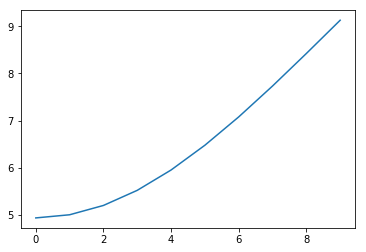

In [409]:
plt.plot(E[0:10,0])

In [410]:
## Calculate phase 

phi = []

for t in range(N_t):

        integral = [np.trapz(x=time[0:t+1], y= E[0:t+1,n]) for n in range(max_lvl)]

        phi.append(integral)  
        
phi = np.array(phi)   

In [411]:
def interaction(n, alfa, f = []):
    test = sum([interp_overlap[n][m](alfa)*np.exp(1j*(phi[t,n] - phi[t,m]) )*f[m] for m in range(max_lvl) if m != n ])*dalfa
    return test

In [412]:
C = np.array([ 0 for n in range(max_lvl) ])
C[0] = 1
C_new = np.array( [ 0 for n in range(max_lvl) ])
C_t = []
C_t.append(C)

for t in range(N_t -1):
    
    dalfa = (alfa[t+1] - alfa[t])/dt

    k1 = np.array([dt*interaction(n, alfa[t], C ) for n in range(max_lvl)])
    k2 = np.array([dt*interaction(n, alfa[t]+ dalfa*dt/2, C + k1/2 ) for n in range(max_lvl)])
    k3 = np.array([dt*interaction(n, alfa[t]+ dalfa*dt/2, C + k2/2 ) for n in range(max_lvl)])
    k4 = np.array([dt*interaction(n, alfa[t]+ dalfa*dt, C + k3) for n in range(max_lvl)])
        
    C_new = C + (k1 + 2*k2 + 2*k3 + k4)/6
        
    C = C_new
    
    C_t.append(C)

C_t = np.array(C_t)

In [413]:
sum ( abs(C)**2)
C_t1 = C_t
time1 = time

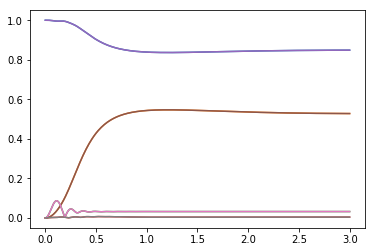

In [414]:
plt.plot(time, abs(C_t))
plt.plot(time1, abs(C_t1))

In [ ]:
def interaction(self,n,alfa, f = [] ):

    self_int = 1j*self.interp_energy[n](alfa)*f[n]
    cross_int = sum([self.interp_overlap[n][m](alfa)*f[m] for m in range(self.max_lvl) if m != n])*self.dalfa_diff
    return - self_int - cross_int 

In [ ]:
for t in range(self.N_diff):


    for n in range(self.max_lvl):

        k1 = self.dt*self.interaction(n, abs(self.alfa), self.C)
        k2 = self.dt*self.interaction(n, abs(self.alfa + self.dalfa_diff*self.dt/2), self.C + k1/2 )
        k3 = self.dt*self.interaction(n, abs(self.alfa + self.dalfa_diff*self.dt/2), self.C + k2/2 )
        k4 = self.dt*self.interaction(n, abs(self.alfa + self.dalfa_diff*self.dt), self.C + k3 )

        self.new_C[n] = self.C[n] + (k1 + 2*k2 + 2*k3 + k4)/6 

    self.alfa = self.alfa + self.dalfa_diff*self.dt

    self.C = self.new_C     

## FULL ALGORITHM

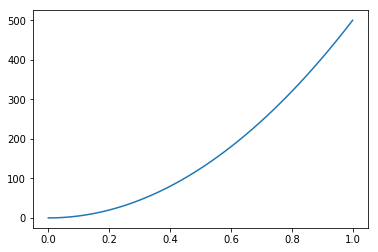

In [503]:
## Define time grid, and regularization function (for fixed boundary conditions)

t_max = 1.0
dt = 1e-2
N_t = int(t_max/dt)

time = np.linspace(0,t_max,N_t)

reg = np.sin(time*pi/(t_max))


## Generate initial guess protocol to improve upon

alfa_max = 500.0

a = alfa_max/t_max**2

alfa_guess = a*time**2

## Choose number of terms in the Fourier expansion and generate protocol alfa

N_c = 10
A = np.zeros(N_c)*0.5
B = np.zeros(N_c)*0.5
w = np.zeros(N_c)*0.5
x0 = np.append(A,np.append(B,w))

fourier = sum([A[n]*np.cos(w[n]*time) + B[n]*np.sin(w[n]*time) for n in range (N_c)])

alfa = alfa_guess*( 1 + reg*fourier )

plt.plot(time,alfa)

In [504]:
res = minimize(Szilard, x0, method='nelder-mead')

c1: 0.6612827317938609, c2: 0.3357082406362109, punishment: 0.9950103533181898
c1: 0.6612649746499986, c2: 0.3357254786505119, punishment: 0.9950046661953004
c1: 0.6612649746499986, c2: 0.3357254786505119, punishment: 0.9950046661953004
c1: 0.6612649746499986, c2: 0.3357254786505119, punishment: 0.9950046661953004
c1: 0.6612649746499986, c2: 0.3357254786505119, punishment: 0.9950046661953004
c1: 0.6612649746499986, c2: 0.3357254786505119, punishment: 0.9950046661953004
c1: 0.6612649746499986, c2: 0.3357254786505119, punishment: 0.9950046661953004
c1: 0.6612649746499986, c2: 0.3357254786505119, punishment: 0.9950046661953004
c1: 0.6612649746499986, c2: 0.3357254786505119, punishment: 0.9950046661953004
c1: 0.6612649746499986, c2: 0.3357254786505119, punishment: 0.9950046661953004
c1: 0.6612649746499986, c2: 0.3357254786505119, punishment: 0.9950046661953004
c1: 0.6612827317938609, c2: 0.3357082406362109, punishment: 0.9950103533181898
c1: 0.6612827317938609, c2: 0.3357082406362109, puni

c1: 0.6611723444656119, c2: 0.3358154043390814, punishment: 0.9949749034298839
c1: 0.6611699806403281, c2: 0.33581769929573885, punishment: 0.9949741417942966
c1: 0.6611457953448847, c2: 0.33584117914179895, punishment: 0.9949663433071939
c1: 0.6611688876625841, c2: 0.33581876031395275, punishment: 0.9949737896155973
c1: 0.6611672342337328, c2: 0.3358203654845363, punishment: 0.9949732567914348
c1: 0.6611654220963435, c2: 0.33582212477862056, punishment: 0.9949726727562725
c1: 0.6611633165933395, c2: 0.3358241688683173, punishment: 0.9949719940974274
c1: 0.661160604823057, c2: 0.33582680163357004, punishment: 0.9949711198853414
c1: 0.6611572685153674, c2: 0.33583004046616194, punishment: 0.9949700441933714
c1: 0.6611538513072986, c2: 0.33583335803654474, punishment: 0.994968942168324
c1: 0.6611501353793573, c2: 0.335836965512299, punishment: 0.9949677435774177
c1: 0.6611484567002179, c2: 0.3358385952732786, punishment: 0.9949672020139388
c1: 0.6611460509184877, c2: 0.33584093088688904,

c1: 0.6608676722798256, c2: 0.3361111685442482, punishment: 0.994875876054672
c1: 0.6608607863556885, c2: 0.33611785237160186, punishment: 0.9948736177849701
c1: 0.6608616466281638, c2: 0.33611701759882445, punishment: 0.9948738999221903
c1: 0.660858779931181, c2: 0.3361198000756563, punishment: 0.9948729595715923
c1: 0.6608541503755133, c2: 0.33612429338401406, punishment: 0.9948714406679114
c1: 0.6608516991569193, c2: 0.33612667221679887, punishment: 0.9948706363280099
c1: 0.6608437996982611, c2: 0.3361343394269628, punishment: 0.9948680432595625
c1: 0.660839907965348, c2: 0.3361381160430467, punishment: 0.9948667654443537
c1: 0.6607750660587414, c2: 0.33620104528555994, punishment: 0.9948454318763673
c1: 0.6608327174651168, c2: 0.33614509520106517, punishment: 0.9948644035237438
c1: 0.6608285292815257, c2: 0.33614916009248225, punishment: 0.9948630273772026
c1: 0.6608242538672652, c2: 0.33615330942063043, punishment: 0.9948616222623613
c1: 0.6608184862491805, c2: 0.3361589072953725,

c1: 0.6601547541627373, c2: 0.3368027793280684, punishment: 0.9946373006017529
c1: 0.660147231131193, c2: 0.3368100755583106, punishment: 0.9946347306966785
c1: 0.660136666580968, c2: 0.3368203200553687, punishment: 0.994631120186447
c1: 0.6601258849209369, c2: 0.336830776022276, punishment: 0.9946274330478798
c1: 0.6599802730600343, c2: 0.33697198057741945, punishment: 0.994577413094295
c1: 0.6601069086296518, c2: 0.3368491769124958, punishment: 0.9946209383069073
c1: 0.6600907418945883, c2: 0.33686485538572913, punishment: 0.9946153992102225
c1: 0.6600788184140467, c2: 0.3368764174602529, punishment: 0.9946113108744302
c1: 0.66005941800385, c2: 0.3368952344035012, punishment: 0.9946046520378763
c1: 0.6600586454745797, c2: 0.3368959804575286, punishment: 0.9946043872978689
c1: 0.6600533556017848, c2: 0.3369011096821754, punishment: 0.9946025705483961
c1: 0.6600333609617234, c2: 0.3369204994957732, punishment: 0.9945956981871275
c1: 0.6600214187672997, c2: 0.3369320800370264, punishmen

c1: 0.6584483786973503, c2: 0.33845662862730397, punishment: 0.9940252615407171
c1: 0.6584039610872526, c2: 0.33849966680278754, punishment: 0.9940085225894255
c1: 0.658411795334799, c2: 0.33849207426335837, punishment: 0.9940114783342743
c1: 0.6583806118712779, c2: 0.3385222895141597, punishment: 0.9939997066545864
c1: 0.6583642987124417, c2: 0.33853809369012, punishment: 0.9939935406445719
c1: 0.6583522603652421, c2: 0.33854975766212664, punishment: 0.9939889865139988
c1: 0.6583125572900388, c2: 0.3385882167199763, punishment: 0.9939739464856336
c1: 0.6582837470700947, c2: 0.338616129918737, punishment: 0.9939630104544313
c1: 0.6582563670053657, c2: 0.3386426441709211, punishment: 0.9939526033043802
c1: 0.6582214358859012, c2: 0.338676481520883, punishment: 0.9939393003927766
c1: 0.6582021639834066, c2: 0.3386951530739046, punishment: 0.9939319491232022
c1: 0.6581757125971056, c2: 0.33872077116937, punishment: 0.9939218479647871
c1: 0.6578066146141847, c2: 0.33907817066858015, punish

c1: 0.654516023604889, c2: 0.3422586157729611, punishment: 0.9923706649344298
c1: 0.6544528338793785, c2: 0.34231959938374384, punishment: 0.9923410368483768
c1: 0.654399170894636, c2: 0.3423713795691439, punishment: 0.9923157968409049
c1: 0.6543296054897573, c2: 0.3424384882484228, punishment: 0.9922829700587534
c1: 0.654253341978292, c2: 0.3425120799433819, punishment: 0.9922468327952767
c1: 0.6534266703917659, c2: 0.3433093747898, punishment: 0.9918453708705081
c1: 0.6541646436872379, c2: 0.342597642081071, punishment: 0.9922046194987786
c1: 0.6540926679393512, c2: 0.34266707041507694, punishment: 0.9921702140337634
c1: 0.6540368129614527, c2: 0.34272094760919236, punishment: 0.9921434209827997
c1: 0.653934717765091, c2: 0.3428194674355202, punishment: 0.9920942245347976
c1: 0.6539437397719908, c2: 0.3428107901644614, punishment: 0.9920985759034643
c1: 0.6538695658033673, c2: 0.3428823420348209, punishment: 0.992062684606122
c1: 0.6538285049100085, c2: 0.34292194604884, punishment: 

c1: 0.6459085373390548, c2: 0.35052671082575615, punishment: 0.9872618843061564
c1: 0.6457811149121699, c2: 0.3506485629619475, punishment: 0.9871678112806812
c1: 0.6456579056509006, c2: 0.3507662410883042, punishment: 0.9870763204689936
c1: 0.6456146513230901, c2: 0.3508075738996522, punishment: 0.9870440568882749
c1: 0.6455085620401534, c2: 0.3509088382168943, punishment: 0.9869646660818595
c1: 0.6453785726857232, c2: 0.3510329717145712, punishment: 0.9868667814500094
c1: 0.6452400629019872, c2: 0.3511652458777078, punishment: 0.986761764273551
c1: 0.6451887235747965, c2: 0.3512142668423287, punishment: 0.9867226537364507
c1: 0.6449782502947151, c2: 0.35141530911809526, punishment: 0.9865612148997398
c1: 0.6448557014437213, c2: 0.3515322392159565, punishment: 0.9864664707331059
c1: 0.6447382716842329, c2: 0.35164428004504233, punishment: 0.9863751329100882
c1: 0.6445814346691526, c2: 0.35179381735486615, punishment: 0.9862523363067321
c1: 0.6443985729825932, c2: 0.3519682307703945, p

c1: 0.6295709613771967, c2: 0.3659442868134726, punishment: 0.9690677771273506
c1: 0.629428697191826, c2: 0.3660764022742719, punishment: 0.9688434807040758
c1: 0.6292932740419668, c2: 0.36620209339112353, punishment: 0.9686287387676795
c1: 0.6289777254599084, c2: 0.3664953886596157, punishment: 0.9681230943246034
c1: 0.6287261096170262, c2: 0.3667289242768027, punishment: 0.9677152111190469
c1: 0.6284448177264631, c2: 0.36698995448531524, punishment: 0.9672539960408593
c1: 0.628309403904934, c2: 0.367115414550766, punishment: 0.9670301449406457
c1: 0.6254638971425966, c2: 0.36974478350508505, punishment: 0.9620224882707258
c1: 0.6279546903126398, c2: 0.3674440274517456, punishment: 0.966437599224319
c1: 0.6277288702309077, c2: 0.3676534456018863, punishment: 0.9660554672131566
c1: 0.6274778830600902, c2: 0.3678855047320169, punishment: 0.9656270394063322
c1: 0.6272516546319251, c2: 0.36809498799557866, punishment: 0.9652366490182844
c1: 0.6268765138422238, c2: 0.36844171801046505, pun

c1: 0.6037140940606142, c2: 0.38909843599181265, punishment: 0.9002987456278507
c1: 0.5998492081697228, c2: 0.3923562404623568, punishment: 0.8841784151971537
c1: 0.6031583776725227, c2: 0.38957021293388844, punishment: 0.8980873164101983
c1: 0.602865858037323, c2: 0.38981918034536334, punishment: 0.896906586744766
c1: 0.6025655973389095, c2: 0.39007352684426144, punishment: 0.8956863575877138
c1: 0.6022144408986564, c2: 0.3903702421574862, punishment: 0.8942468393208323
c1: 0.6021556285672035, c2: 0.3904201176892882, punishment: 0.8940038287196371
c1: 0.6018819966508434, c2: 0.39065129544680005, punishment: 0.8928695515737587
c1: 0.6015753119536187, c2: 0.39090939703296435, punishment: 0.8915895037097765
c1: 0.6013110458238041, c2: 0.3911324222780356, punishment: 0.890475580832964
c1: 0.6008734578957736, c2: 0.39149884605356344, punishment: 0.8886186624000614
c1: 0.6005339184950734, c2: 0.3917833114098429, punishment: 0.8871608635489125
c1: 0.6002281293667906, c2: 0.39203903522199174,

c1: 0.5719590560997566, c2: 0.41315813720484346, punishment: 0.7197186864283405
c1: 0.5716434923131865, c2: 0.41335903039150007, punishment: 0.7174627166244218
c1: 0.5714488262461687, c2: 0.4134794119838084, punishment: 0.7160833847657144
c1: 0.570903195776298, c2: 0.4138229127285755, punishment: 0.7121671514133874
c1: 0.5705735518452592, c2: 0.414027186579849, punishment: 0.7098029449959203
c1: 0.5702251982407369, c2: 0.4142423625406611, punishment: 0.7072964875120497
c1: 0.569914484424023, c2: 0.4144313530626755, punishment: 0.7050657553843656
c1: 0.5696692299685996, c2: 0.4145826174495491, punishment: 0.7032879338359961
c1: 0.5655641830982537, c2: 0.41699398332679005, punishment: 0.6733500239219103
c1: 0.5690908909380459, c2: 0.4149341074514993, punishment: 0.6990995285562702
c1: 0.5687619201920826, c2: 0.41513070769950533, punishment: 0.6967203143904563
c1: 0.5684315591707558, c2: 0.41532921569038733, punishment: 0.694315575179995
c1: 0.5680226174447703, c2: 0.4155709244507475, pun

c1: 0.540906956311531, c2: 0.42642647742272244, punishment: 0.5076887939883752
c1: 0.5375963961517294, c2: 0.42659825028809334, punishment: 0.49344916062278776
c1: 0.5405024733699788, c2: 0.42646909866260835, punishment: 0.5057552207974989
c1: 0.5402314466848083, c2: 0.42650143752682346, punishment: 0.5044370048575298
c1: 0.5399708970135261, c2: 0.4265234252948136, punishment: 0.5032398494543603
c1: 0.5396664066339367, c2: 0.42653376746216, punishment: 0.5019581223644216
c1: 0.539584581847434, c2: 0.42655453281074485, punishment: 0.501482994622807
c1: 0.5393404070544532, c2: 0.42656897843309943, punishment: 0.5004153648748735
c1: 0.5390978922885071, c2: 0.42658149121093314, punishment: 0.4993721465604747
c1: 0.538901517840597, c2: 0.4265910692865253, punishment: 0.49853422535435266
c1: 0.5385140928623877, c2: 0.4266034175558762, punishment: 0.4969367475290053
c1: 0.5382557966824869, c2: 0.42660363702538445, punishment: 0.4959365912292951
c1: 0.5380012867641386, c2: 0.4266020161248808, 

c1: 0.5336751026029095, c2: 0.4255146013225586, punishment: 0.4873739849376597
c1: 0.5340303473338852, c2: 0.42574870659527536, punishment: 0.4868216899156592
c1: 0.5355461652132721, c2: 0.4263047819584594, punishment: 0.4880106742763465
c1: 0.5339672128035963, c2: 0.4257287053188768, punishment: 0.4867538251571124
c1: 0.5336456692855943, c2: 0.42547069576175855, punishment: 0.4876077454985488
c1: 0.5348354408170113, c2: 0.4261290243762745, punishment: 0.48677600806333443
c1: 0.5336721139106542, c2: 0.4255058337039713, punishment: 0.48743062267201176
c1: 0.5347947734798515, c2: 0.4261111776698669, punishment: 0.48676601807812325
c1: 0.5336677944806917, c2: 0.4255079967861277, punishment: 0.4873991940634007
c1: 0.5347764502431092, c2: 0.4261029995138038, punishment: 0.48676262279418225
c1: 0.5352244516424687, c2: 0.42624617942065535, punishment: 0.4872868768468297
c1: 0.5340513511945816, c2: 0.4257607149103489, punishment: 0.48680356705567507
c1: 0.535124054980117, c2: 0.426226814151777

c1: 0.5340736175569342, c2: 0.4257845696165511, punishment: 0.48669966256971064
c1: 0.5345225363535874, c2: 0.4260062393078921, punishment: 0.48659394349715357
c1: 0.5345244000605632, c2: 0.4260125919686009, punishment: 0.48655228450690924
c1: 0.5342544747850648, c2: 0.42589248317216233, punishment: 0.4865123545100811
c1: 0.5341359139505948, c2: 0.4258387986190266, punishment: 0.4865047198328898
c1: 0.5345172033404816, c2: 0.42601160976715896, punishment: 0.4865342349081432
c1: 0.5346440967860384, c2: 0.4260616097740156, punishment: 0.486605076775946
c1: 0.5347108250786793, c2: 0.42608359861543715, punishment: 0.4866757550943971
c1: 0.5342578408680744, c2: 0.4258867933300529, punishment: 0.4865674986152032
c1: 0.5341495632685099, c2: 0.42583268101105815, punishment: 0.4865991668531081
c1: 0.5345680076186962, c2: 0.4260336508300204, punishment: 0.48654700693119635
c1: 0.5346270594486863, c2: 0.42605733645129684, punishment: 0.4865769289946734
c1: 0.5346087995468076, c2: 0.42605199226004

c1: 0.5347343772147384, c2: 0.42614043223229425, punishment: 0.48632847340865004
c1: 0.5342091344560376, c2: 0.425917878919972, punishment: 0.48615959322462987
c1: 0.5342630515195675, c2: 0.4259521030498876, punishment: 0.48608879132447425
c1: 0.5342053766949233, c2: 0.4259234679266454, punishment: 0.48610383105969324
c1: 0.5346207064775786, c2: 0.426109115970964, punishment: 0.48616116123973685
c1: 0.5346030980304369, c2: 0.4261074219371089, punishment: 0.4861113897604086
c1: 0.5346418027992658, c2: 0.42612355262586854, punishment: 0.4861266259064112
c1: 0.5341280777000184, c2: 0.4258672635136964, punishment: 0.4862604379956801
c1: 0.5345528195385493, c2: 0.4260906056975648, punishment: 0.4860604309711465
c1: 0.5343719944486279, c2: 0.42601012726517, punishment: 0.48603161693690544
c1: 0.534325386176883, c2: 0.42600771631502204, punishment: 0.48588536757543355
c1: 0.5341886472056807, c2: 0.4259178896095317, punishment: 0.4860875032297528
c1: 0.534254137235718, c2: 0.42595931675919496,

c1: 0.5342128764053303, c2: 0.4261257096332174, punishment: 0.48459030428045724
c1: 0.5341148782702068, c2: 0.4261279085771689, punishment: 0.48422831433334423
c1: 0.5343824204573895, c2: 0.42621148541460746, punishment: 0.4845369067248583
c1: 0.5342025047640291, c2: 0.42613265103879067, punishment: 0.48450086704136586
c1: 0.5342333044484591, c2: 0.42614395492195983, punishment: 0.48452344300369976
c1: 0.5340976443399228, c2: 0.42608527430659476, punishment: 0.48449259059369976
c1: 0.5341240793927221, c2: 0.42610503506514036, punishment: 0.48443498526111284
c1: 0.5344806548263821, c2: 0.42626060668095733, punishment: 0.4845120589022721
c1: 0.5339404913128364, c2: 0.42599410792060177, punishment: 0.4846365511494416
c1: 0.5339281877377028, c2: 0.4259975600723878, punishment: 0.48456717986874476
c1: 0.5339626144930534, c2: 0.4260334994544304, punishment: 0.48441352437105034
c1: 0.5343923555506661, c2: 0.4262369686231242, punishment: 0.4843782844845653
c1: 0.5344630408896035, c2: 0.4262565

c1: 0.533965958783009, c2: 0.42648670069837374, punishment: 0.4809676949864711
c1: 0.5338778318962665, c2: 0.42645165126484297, punishment: 0.4809249024034554
c1: 0.533793943391303, c2: 0.42642329697766856, punishment: 0.48084676232360724
c1: 0.5336839847490846, c2: 0.42637937987830027, punishment: 0.48079716514767634
c1: 0.5337946766098817, c2: 0.4264401114087915, punishment: 0.48072088039426386
c1: 0.5342352948721854, c2: 0.42660970135248, punishment: 0.4809832563952302
c1: 0.5341021925008422, c2: 0.42658441052127416, punishment: 0.4807037924628552
c1: 0.5337048831385381, c2: 0.42640718495256047, punishment: 0.4806577424591397
c1: 0.5339861035662826, c2: 0.4265463571925706, punishment: 0.480583538902133
c1: 0.5336814725087929, c2: 0.42641997101633744, punishment: 0.48047805435869084
c1: 0.5340190527802094, c2: 0.4265710165450661, punishment: 0.4805117862230268
c1: 0.534123191205493, c2: 0.4266155683076082, punishment: 0.4805406393334698
c1: 0.533984592532613, c2: 0.4265747502945306, 

c1: 0.5329115911837499, c2: 0.42713770096728665, punishment: 0.4722901883232493
c1: 0.5326930685071067, c2: 0.42725019104086215, punishment: 0.47066678172094745
c1: 0.5326820331070892, c2: 0.4270636354288669, punishment: 0.47206539466925346
c1: 0.5326788273525889, c2: 0.4270870575009581, punishment: 0.47187395073615246
c1: 0.5327970774468873, c2: 0.4271814822997462, punishment: 0.47155602185697165
c1: 0.5332406877042147, c2: 0.42732974365154397, punishment: 0.4719640696468752
c1: 0.5327175711057914, c2: 0.427147316628245, punishment: 0.4715437683889022
c1: 0.53269306175024, c2: 0.4271513637260388, punishment: 0.4714278736889589
c1: 0.5324213554382932, c2: 0.4270368641192795, punishment: 0.47137519316534304
c1: 0.5329704688021227, c2: 0.4273002333686722, punishment: 0.4712453678687605
c1: 0.5325903662149382, c2: 0.42715357966224937, punishment: 0.4710563066625827
c1: 0.5326710258406254, c2: 0.42720087070510543, punishment: 0.4709704113738714
c1: 0.532486835473277, c2: 0.4271257031711696

c1: 0.530027736293024, c2: 0.4282371823779058, punishment: 0.4540111332399791
c1: 0.5300010165030802, c2: 0.4282567528364182, punishment: 0.45377016603442577
c1: 0.5302932585067429, c2: 0.4283979263439479, punishment: 0.453627251323522
c1: 0.5297017442225808, c2: 0.4281832995687594, punishment: 0.4533700463636112
c1: 0.5298932981248817, c2: 0.4282942416953639, punishment: 0.453123623411264
c1: 0.5300528431256728, c2: 0.4283997159788108, punishment: 0.45281996833784977
c1: 0.5298026331560376, c2: 0.42836135518670954, punishment: 0.45230090380248567
c1: 0.5297316748599038, c2: 0.4283557656960387, punishment: 0.45211336282208237
c1: 0.5291323334600073, c2: 0.42856288505716406, punishment: 0.44854521239405654
c1: 0.5293545168186631, c2: 0.4282537476562968, punishment: 0.4516937173946839
c1: 0.5299278844752754, c2: 0.42851822146458823, punishment: 0.45148041485902624
c1: 0.529448712519499, c2: 0.42837148772657047, punishment: 0.4510714787058383
c1: 0.5298242805794615, c2: 0.4285497743636999

c1: 0.5233323589946733, c2: 0.4298854128462875, punishment: 0.42076408436755053
c1: 0.5239865598925075, c2: 0.430124978311209, punishment: 0.4206145876608435
c1: 0.5234145862279589, c2: 0.4300017769712987, punishment: 0.42004189310413365
c1: 0.5221889334724729, c2: 0.43021342466642504, punishment: 0.41506320863894797
c1: 0.5231280052282923, c2: 0.4299483886752659, punishment: 0.41970186839910284
c1: 0.5233806274656456, c2: 0.43012976216241156, punishment: 0.4189104409458341
c1: 0.5232132320434086, c2: 0.4301326363434857, punishment: 0.4184336805616117
c1: 0.5228705644542695, c2: 0.42998153280398066, punishment: 0.418744492405284
c1: 0.5233243205255727, c2: 0.43021077122949625, punishment: 0.4180996338198877
c1: 0.5230912487246182, c2: 0.430186677415372, punishment: 0.41766568850922536
c1: 0.5235925093108157, c2: 0.4303539768144174, punishment: 0.41766972192788765
c1: 0.5233585915540349, c2: 0.4303733879471316, punishment: 0.4168721911701202
c1: 0.5226355497133082, c2: 0.430240194003935

c1: 0.5140483137586033, c2: 0.430948819836379, punishment: 0.39136836331330904
c1: 0.5152818147813009, c2: 0.4312248474503571, punishment: 0.391254835001005
c1: 0.5149275457299195, c2: 0.4311693665217863, punishment: 0.3910680588776979
c1: 0.5142158780131485, c2: 0.43084641695085324, punishment: 0.39251690032656317
c1: 0.5147086428877397, c2: 0.43112733164630296, punishment: 0.3910254866669075
c1: 0.5138476327260842, c2: 0.43077960116330993, punishment: 0.39245076070995033
c1: 0.5142333371376923, c2: 0.4310322868949664, punishment: 0.3909855801886113
c1: 0.5129949115186543, c2: 0.4306204649473672, punishment: 0.3924001535339362
c1: 0.5144974845953764, c2: 0.4310804016519469, punishment: 0.3910437236149992
c1: 0.5139642519783384, c2: 0.430962473103988, punishment: 0.39111023975816517
c1: 0.5143829660875634, c2: 0.4310427342830368, punishment: 0.3911585687938166
c1: 0.5142060158278042, c2: 0.43099771494615285, punishment: 0.3912287044871411
c1: 0.5139835819957149, c2: 0.4309575865093798,

c1: 0.5150288578186503, c2: 0.4311890080658206, punishment: 0.3910882417000543
c1: 0.5150318378490228, c2: 0.4311836137777944, punishment: 0.3911389000465202
c1: 0.5143335394132678, c2: 0.4310525170795434, punishment: 0.3909899904215094
c1: 0.514216080605793, c2: 0.4310207516017402, punishment: 0.3910525875989814
c1: 0.5140293955778938, c2: 0.4309750153824346, punishment: 0.3911158408182216
c1: 0.5147685656712867, c2: 0.43114173226848174, punishment: 0.3910122684402576
c1: 0.5146698950742635, c2: 0.4311022751090297, punishment: 0.3911663684900202
c1: 0.5144645681722544, c2: 0.43108080860008013, punishment: 0.3909822512223552
c1: 0.5141152929617084, c2: 0.430998249859963, punishment: 0.39106777214691946
c1: 0.5143091994523442, c2: 0.43104763897423365, punishment: 0.39098849997829765
c1: 0.5147376843772722, c2: 0.4311183775070854, punishment: 0.39115266601249576
c1: 0.5144070546616692, c2: 0.4310694397937466, punishment: 0.39097656776569123
c1: 0.5144257463714953, c2: 0.43106716706663445

c1: 0.5142894608485344, c2: 0.4310462147750882, punishment: 0.39096608235120645
c1: 0.51415541704886, c2: 0.431014892891755, punishment: 0.39099699895271
c1: 0.5145662419974333, c2: 0.4311053576159984, punishment: 0.3909559702921126
c1: 0.5145345116129572, c2: 0.43109910441722904, punishment: 0.3909522115523628
c1: 0.5146375919106784, c2: 0.4311171551394941, punishment: 0.390983879574776
c1: 0.5146283246016119, c2: 0.431117167199585, punishment: 0.39096726065255427
c1: 0.5143316579574514, c2: 0.43105722710970984, punishment: 0.3909471511771775
c1: 0.514221121504258, c2: 0.43103054692917814, punishment: 0.39097902817610064
c1: 0.5145729652753541, c2: 0.4311065405331491, punishment: 0.39095797520572895
c1: 0.5144244756297334, c2: 0.43107485582159905, punishment: 0.39096168565986456
c1: 0.5145258249632108, c2: 0.43109670347969586, punishment: 0.3909569878259669
c1: 0.5145542219406857, c2: 0.4311035285216088, punishment: 0.3909500018338382
c1: 0.5146257480731005, c2: 0.4311167054370674, pu

c1: 0.5143525289701119, c2: 0.43106252612283763, punishment: 0.3909391139891102
c1: 0.5145236466907591, c2: 0.4310996029888436, punishment: 0.39092879818213777
c1: 0.5143506538178092, c2: 0.43106434872350446, punishment: 0.3909205306191278
c1: 0.514535895217919, c2: 0.43110323900037095, punishment: 0.3909199607709998
c1: 0.5144062180902406, c2: 0.4310769014356458, punishment: 0.3909124513372487
c1: 0.5145013605581377, c2: 0.43109649743430645, punishment: 0.3909154656116328
c1: 0.5145515215038451, c2: 0.4311059322674455, punishment: 0.39092504174351095
c1: 0.5144791598259558, c2: 0.4310905534407581, punishment: 0.39092617142740405
c1: 0.5145626377712438, c2: 0.4311067794689151, punishment: 0.390937643811734
c1: 0.51455937646148, c2: 0.43110770228862694, punishment: 0.39092411473588873
c1: 0.5144686890191257, c2: 0.4310904301635787, punishment: 0.3909087445164522
c1: 0.5144718486173595, c2: 0.43109263866989167, punishment: 0.39089577505364237
c1: 0.5143658502510754, c2: 0.431065826379167

c1: 0.514455480042688, c2: 0.4310961464974165, punishment: 0.3908374860392245
c1: 0.5143372958399383, c2: 0.43107202581385645, punishment: 0.39083271911907314
c1: 0.5144372004784623, c2: 0.43109303412169436, punishment: 0.39083144149911586
c1: 0.5144320293018466, c2: 0.4310906013064177, punishment: 0.39084277155558744
c1: 0.5142870538819952, c2: 0.4310619297693954, punishment: 0.3908299022218845
c1: 0.5144792521231188, c2: 0.4311027909228796, punishment: 0.3908236109800033
c1: 0.5145006837780084, c2: 0.4311066861800315, punishment: 0.3908287498768478
c1: 0.5143523705938724, c2: 0.43107740618046037, punishment: 0.39081388356253977
c1: 0.5142699864475073, c2: 0.4310634516605069, punishment: 0.39078742784423426
c1: 0.514455064257733, c2: 0.431097275980906, punishment: 0.39082727207556445
c1: 0.5142818080443545, c2: 0.4310589382941776, punishment: 0.39084589847718487
c1: 0.5144147475413869, c2: 0.43109054416356124, punishment: 0.3908128826615527
c1: 0.51445610195452, c2: 0.4310995523800083

c1: 0.5143731343845391, c2: 0.4311088886410034, punishment: 0.3905858673631195
c1: 0.5142029551253428, c2: 0.43107804273697914, punishment: 0.39054856464941545
c1: 0.5140781510289414, c2: 0.4310495597504553, punishment: 0.39057278497132275
c1: 0.5141341653885446, c2: 0.4310611750684079, punishment: 0.3905714848898105
c1: 0.5141452284385275, c2: 0.43106558711151366, punishment: 0.39055347928255735
c1: 0.5141438023235304, c2: 0.4310659296103544, punishment: 0.3905481427500255
c1: 0.5141374883396591, c2: 0.43106216148035614, punishment: 0.39056892175820235
c1: 0.5142477516803751, c2: 0.43108891872634286, punishment: 0.3905348776177413
c1: 0.5143591719525165, c2: 0.43110439387522265, punishment: 0.39059916135271733
c1: 0.5141748338767756, c2: 0.4310747222737749, punishment: 0.3905278245309066
c1: 0.5142774185159616, c2: 0.43109517445530904, punishment: 0.39053390933376964
c1: 0.5141440942935034, c2: 0.43106935786542355, punishment: 0.39051984060015943
c1: 0.5140694867613663, c2: 0.43105972

c1: 0.5140419193067934, c2: 0.4311198548459783, punishment: 0.3899198819817672
c1: 0.5140313224435024, c2: 0.43111926096407976, punishment: 0.38990672396075243
c1: 0.513923026902366, c2: 0.4310960758224441, punishment: 0.3899169261933427
c1: 0.5139577065117277, c2: 0.43110735583894033, punishment: 0.38988108552855705
c1: 0.5139734855683854, c2: 0.43111209036804116, punishment: 0.38986817538683505
c1: 0.5138873233898393, c2: 0.43109479902518505, punishment: 0.3898670820249164
c1: 0.5139423916123312, c2: 0.4311080501695468, punishment: 0.38984917820491016
c1: 0.514105239759471, c2: 0.4311429664738083, punishment: 0.38983440135590985
c1: 0.5139797035878121, c2: 0.43111771667869486, punishment: 0.3898314855664847
c1: 0.5139118161360435, c2: 0.4311045896297223, punishment: 0.3898263070646104
c1: 0.514012870394233, c2: 0.43112656013372697, punishment: 0.3898138018785664
c1: 0.5138590220872624, c2: 0.4310966165618316, punishment: 0.3898038854633936
c1: 0.5140508396575144, c2: 0.43114038726552

c1: 0.5142225615913135, c2: 0.4313417423562401, punishment: 0.3883675569168208
c1: 0.5141703861594357, c2: 0.4313276572777624, punishment: 0.3883952569988812
c1: 0.5141181428699974, c2: 0.4313277597633752, punishment: 0.3883040011091634
c1: 0.5141009279211335, c2: 0.4313262402381807, punishment: 0.38828705144169495
c1: 0.5142309719954133, c2: 0.4313510676384495, punishment: 0.3883038751670982
c1: 0.5142133833800093, c2: 0.4313514468302953, punishment: 0.3882700866532116
c1: 0.5141657242081453, c2: 0.4313481877433084, punishment: 0.38821471947494535
c1: 0.5143199391484442, c2: 0.4313737797331538, punishment: 0.3882685356668152
c1: 0.5140797265120913, c2: 0.4313386990777287, punishment: 0.38814582089661565
c1: 0.5140200292691466, c2: 0.43136563805002726, punishment: 0.38781679463665153
c1: 0.5141303839858262, c2: 0.43135419298711786, punishment: 0.38810308928563286
c1: 0.5143603789411458, c2: 0.43138236033700117, punishment: 0.3882674462287299
c1: 0.5144067963512802, c2: 0.43140516122253

c1: 0.5139534803853079, c2: 0.4316452588804747, punishment: 0.3853529171030846
c1: 0.5140953959942928, c2: 0.4316718928926207, punishment: 0.385373824627708
c1: 0.514151247474754, c2: 0.4316908691825226, punishment: 0.3853114214771801
c1: 0.5142939459353526, c2: 0.43171390447494684, punishment: 0.3853675138193974
c1: 0.514006656359928, c2: 0.4316702414148143, punishment: 0.3852344067813913
c1: 0.5142428422583154, c2: 0.4317251321660044, punishment: 0.3851836129127305
c1: 0.5138130670315503, c2: 0.43164852330442816, punishment: 0.3850857911605269
c1: 0.513500471415561, c2: 0.43165671859836324, punishment: 0.3844915988360239
c1: 0.5139897615040393, c2: 0.4316980013685981, punishment: 0.38497209879911676
c1: 0.5140824823007353, c2: 0.4317187273221241, punishment: 0.38495807983340924
c1: 0.5139276513767728, c2: 0.43167976852895523, punishment: 0.3850186581634567
c1: 0.513951569979299, c2: 0.4316928964400384, punishment: 0.3849493581928478
c1: 0.5139516998669611, c2: 0.4316835928184357, pun

c1: 0.5125354667213212, c2: 0.4320195697716774, punishment: 0.37988335528099304
c1: 0.5125680600990817, c2: 0.432057352794998, punishment: 0.37961556980226463
c1: 0.5122737515299697, c2: 0.43212656013076556, punishment: 0.378578001806427
c1: 0.5125750575745264, c2: 0.4320773639716332, punishment: 0.37945779306485616
c1: 0.5125183221709568, c2: 0.4320678979033897, punishment: 0.37944924982745465
c1: 0.512412874768506, c2: 0.4320545522407521, punishment: 0.3793986384979722
c1: 0.5125222237090314, c2: 0.4320833493623041, punishment: 0.379325042557213
c1: 0.5123701106614221, c2: 0.4320637046966091, punishment: 0.37925566812845435
c1: 0.5124092100279534, c2: 0.4320894723449672, punishment: 0.37909850076000695
c1: 0.5124625859307721, c2: 0.43210621170863184, punishment: 0.37903977788378473
c1: 0.5121391411232573, c2: 0.4320450574446465, punishment: 0.3790615377045765
c1: 0.5123182834555642, c2: 0.4321022160417257, punishment: 0.378851389542774
c1: 0.5119154452232529, c2: 0.43200979590761385,

c1: 0.5099666846128683, c2: 0.432698966059067, punishment: 0.3705295679726903
c1: 0.5099304009406848, c2: 0.4326946299296135, punishment: 0.3705208643169733
c1: 0.5099940251081985, c2: 0.4327174669399367, punishment: 0.37040717576544513
c1: 0.510131839402161, c2: 0.43275109075608814, punishment: 0.3702969981684048
c1: 0.5099397615102527, c2: 0.43274326703904725, punishment: 0.3701204691446738
c1: 0.5097903654703763, c2: 0.43272375817463254, punishment: 0.37010012261923975
c1: 0.5102431314057523, c2: 0.43280008399733844, punishment: 0.37002493842146134
c1: 0.5101500390194791, c2: 0.4327818965694503, punishment: 0.37005935107483023
c1: 0.5102468358683664, c2: 0.4328126991652562, punishment: 0.36992291118074616
c1: 0.5099038706543151, c2: 0.43277571898471584, punishment: 0.36980063747027414
c1: 0.5103631980778156, c2: 0.4328557535429507, punishment: 0.3697095730531831
c1: 0.5104928247721464, c2: 0.4330026844387774, punishment: 0.36863678653547916
c1: 0.5096124047289139, c2: 0.432791617558

c1: 0.5076459847823573, c2: 0.4331892141432207, punishment: 0.36378213483464594
c1: 0.5077475266575887, c2: 0.43323003867128473, punishment: 0.36353457980657466
c1: 0.5074713549114772, c2: 0.43323547239485705, punishment: 0.363220813215149
c1: 0.5072963338057545, c2: 0.43313233579383537, punishment: 0.3639334611870696
c1: 0.5077128331629566, c2: 0.43323616914091817, punishment: 0.3634483329774344
c1: 0.5068729421379123, c2: 0.43311536105491, punishment: 0.36369624410168355
c1: 0.5075979913681449, c2: 0.43313095751572855, punishment: 0.36423089979920475
c1: 0.507273218771139, c2: 0.4331327124152754, punishment: 0.36390883582927047
c1: 0.5073509805022445, c2: 0.4332088970486386, punishment: 0.36333319846873013
c1: 0.5067837341975238, c2: 0.4331269334803613, punishment: 0.3635202063618913
c1: 0.5074563591280614, c2: 0.4330483941551501, punishment: 0.36479753072879806
c1: 0.5079283190228122, c2: 0.433204020328096, punishment: 0.3639360143189079
c1: 0.5078800140545385, c2: 0.433220583129446

c1: 0.505038670211742, c2: 0.43312120449271646, punishment: 0.362254608773363
c1: 0.5052914833909306, c2: 0.4331115518982559, punishment: 0.36250345947620477
c1: 0.5056981526355087, c2: 0.4331771310651104, punishment: 0.36222930700744194
c1: 0.5046718246304354, c2: 0.4331102240820936, punishment: 0.362121088011955
c1: 0.5052949980073581, c2: 0.43313638774633767, punishment: 0.36229403051955666
c1: 0.5053359327507054, c2: 0.4331214459714765, punishment: 0.36244919864634584
c1: 0.505566559394965, c2: 0.4331681278704234, punishment: 0.36221151038626
c1: 0.5046904562001968, c2: 0.4331049742350934, punishment: 0.36217701374524003
c1: 0.5045809905453182, c2: 0.4330942475469243, punishment: 0.36220382306549537
c1: 0.5054112066467308, c2: 0.4331374761012427, punishment: 0.3623640858130529
c1: 0.5053828241499289, c2: 0.43315653999540543, punishment: 0.3621819944702749
c1: 0.5052039446755865, c2: 0.43312207694960325, punishment: 0.36235511881870663
c1: 0.5054631694433507, c2: 0.43316260069011536

c1: 0.5054342175501053, c2: 0.4331661926305644, punishment: 0.3621351505450957
c1: 0.5046947541323928, c2: 0.43311311329552216, punishment: 0.36211013309108453
c1: 0.5047788405151864, c2: 0.43311919200700216, punishment: 0.3621090783447113
c1: 0.5044576145378297, c2: 0.43309243259715524, punishment: 0.36214818679115945
c1: 0.5051343785138628, c2: 0.4331466242565309, punishment: 0.36209988605056076
c1: 0.5048972429739306, c2: 0.43312651612009395, punishment: 0.36211966983055455
c1: 0.5051040261895104, c2: 0.4331403705449407, punishment: 0.36213340319706033
c1: 0.5048283795752886, c2: 0.43312292741314184, punishment: 0.3621075660722738
c1: 0.5044525977766026, c2: 0.4330939062738302, punishment: 0.3621327570662034
c1: 0.5051276427068753, c2: 0.4331459812464679, punishment: 0.36210096105206213
c1: 0.5047698888501636, c2: 0.4331187037662288, punishment: 0.36210779178673447
c1: 0.5047326042149883, c2: 0.43311446992090535, punishment: 0.36212131821551896
c1: 0.5046520700396905, c2: 0.43310560

c1: 0.5046674096840614, c2: 0.43311102331999857, punishment: 0.3621116375573693
c1: 0.5048909456303148, c2: 0.43312790055026246, punishment: 0.3621039266854702
c1: 0.5049513381868241, c2: 0.4331320267014145, punishment: 0.3621066421347878
c1: 0.504757508083391, c2: 0.4331193442152412, punishment: 0.3620948026261043
c1: 0.5046488736291379, c2: 0.433109167843189, punishment: 0.3621164560326392
c1: 0.5048989990761181, c2: 0.43312861579124695, punishment: 0.3621028539965021
c1: 0.5046833224272903, c2: 0.43311235314166, punishment: 0.36210978109204794
c1: 0.5048790276121541, c2: 0.4331272086970279, punishment: 0.3621024016729514
c1: 0.5047629579822249, c2: 0.4331194442431865, punishment: 0.36209725892112365
c1: 0.5047284649350113, c2: 0.43311664688643065, punishment: 0.3621002441251614
c1: 0.5047507778976688, c2: 0.4331186309522612, punishment: 0.36209680660021304
c1: 0.5047023393441348, c2: 0.43311422722459353, punishment: 0.36210517447890944
c1: 0.504849573092898, c2: 0.4331251716228573, 

c1: 0.5048152935685173, c2: 0.43312430197520635, punishment: 0.3620877879964498
c1: 0.5048105197860421, c2: 0.43312340141805533, punishment: 0.36209254042779304
c1: 0.5048019704480151, c2: 0.4331232744105825, punishment: 0.36208838171966207
c1: 0.5047854656737418, c2: 0.43312161577108993, punishment: 0.36209243965638416
c1: 0.5048133946010628, c2: 0.43312414971583457, punishment: 0.3620879207052211
c1: 0.5048088071885057, c2: 0.43312371559963003, punishment: 0.36208880886702266
c1: 0.5048123936645136, c2: 0.43312394477491784, punishment: 0.3620890546844644
c1: 0.5048080726356006, c2: 0.43312299395223264, punishment: 0.3620945155061478
c1: 0.5048038768974293, c2: 0.4331235088772663, punishment: 0.3620875493968464
c1: 0.5048201519117738, c2: 0.4331244340165789, punishment: 0.36208964760997286
c1: 0.5048227804873846, c2: 0.43312469576099544, punishment: 0.36208903130110015
c1: 0.5047999625151666, c2: 0.4331228590330422, punishment: 0.36209069595135857
c1: 0.5048103352863819, c2: 0.4331239

c1: 0.5048088385517955, c2: 0.4331239612564137, punishment: 0.36208673211030074
c1: 0.5048140633710254, c2: 0.4331242789932416, punishment: 0.36208722841065866
c1: 0.504810461209973, c2: 0.43312417530750896, punishment: 0.3620859014894363
c1: 0.5048103011274669, c2: 0.4331240582266927, punishment: 0.3620868022011966
c1: 0.5048122026084936, c2: 0.43312429613022757, punishment: 0.36208593955180723
c1: 0.504814628189884, c2: 0.43312439007452425, punishment: 0.3620866275729143
c1: 0.5048136319113178, c2: 0.43312428281229426, punishment: 0.3620869308391842
c1: 0.5048109385430879, c2: 0.43312420764033516, punishment: 0.3620859185883999
c1: 0.5048173248770736, c2: 0.43312463443984395, punishment: 0.3620861995497746
c1: 0.5048202941841394, c2: 0.4331247751241905, punishment: 0.36208682473280307
c1: 0.5048084554380251, c2: 0.43312403030357544, punishment: 0.36208590794405027
c1: 0.5048161955746959, c2: 0.43312448719559954, punishment: 0.3620867618634912
c1: 0.5048104924290628, c2: 0.43312417733

c1: 0.5048089362542196, c2: 0.4331242089077385, punishment: 0.36208467903813635
c1: 0.5048089394636862, c2: 0.4331241232787928, punishment: 0.3620854116121782
c1: 0.5048078295821818, c2: 0.43312411289268743, punishment: 0.36208481935195713
c1: 0.504809124263232, c2: 0.4331242213860659, punishment: 0.3620846879234154
c1: 0.5048107177632748, c2: 0.4331242581655172, punishment: 0.36208535198724157
c1: 0.5048047274823707, c2: 0.43312385897242767, punishment: 0.3620850836553615
c1: 0.5048091598935754, c2: 0.43312423913118153, punishment: 0.3620845583797857
c1: 0.504808872115581, c2: 0.43312422834882874, punishment: 0.3620844738112182
c1: 0.5048082224765046, c2: 0.4331240745423155, punishment: 0.36208538757618347
c1: 0.5048100503262078, c2: 0.43312425577377983, punishment: 0.3620849627725071
c1: 0.5048058262301824, c2: 0.433123959237084, punishment: 0.3620849017831339
c1: 0.5048039868227183, c2: 0.4331237683352731, punishment: 0.36208540300489656
c1: 0.5048116099336382, c2: 0.433124371314636

c1: 0.5048068617529758, c2: 0.43312443250588845, punishment: 0.36208149873263995
c1: 0.5048039353814332, c2: 0.4331242956894899, punishment: 0.36208087195214755
c1: 0.5048034031439461, c2: 0.43312430281438336, punishment: 0.3620804849679472
c1: 0.5048011840674274, c2: 0.4331240978765161, punishment: 0.36208087393628974
c1: 0.5047995683512979, c2: 0.4331239290619956, punishment: 0.3620813247653568
c1: 0.5048061822873476, c2: 0.43312447173875734, punishment: 0.3620807473170089
c1: 0.5048050733564338, c2: 0.4331244022141614, punishment: 0.36208066060939126
c1: 0.5048017201493684, c2: 0.4331241743647684, punishment: 0.3620805497142986
c1: 0.5048018999441722, c2: 0.43312422531100003, punishment: 0.3620802251753099
c1: 0.5048045182182056, c2: 0.4331244323249115, punishment: 0.3620800633890541
c1: 0.5048051592601176, c2: 0.4331245888305732, punishment: 0.3620791210160651
c1: 0.5048041566381605, c2: 0.433124329840646, punishment: 0.3620807161780777
c1: 0.5047997658643101, c2: 0.433124024104312

c1: 0.5047985515325811, c2: 0.43312499035931934, punishment: 0.36207164687800397
c1: 0.5047982529830919, c2: 0.4331250013375921, punishment: 0.362071370433915
c1: 0.5047981570219315, c2: 0.4331249965524593, punishment: 0.36207135251634204
c1: 0.504797754238748, c2: 0.43312498105196207, punishment: 0.3620712382071837
c1: 0.5047940820701796, c2: 0.4331247224759242, punishment: 0.3620711974934153
c1: 0.5048027976181251, c2: 0.4331253243915503, punishment: 0.36207139754009066
c1: 0.5047933404996959, c2: 0.4331246741231562, punishment: 0.36207115650408384
c1: 0.5048010297465979, c2: 0.4331251734739929, punishment: 0.3620716021119733
c1: 0.5047995854884516, c2: 0.4331251353187183, punishment: 0.3620710431262951
c1: 0.504795542241036, c2: 0.4331249259458889, punishment: 0.36207035468114046
c1: 0.5047974491633687, c2: 0.43312506731254896, punishment: 0.3620703154674645
c1: 0.5047940844237641, c2: 0.4331247351487223, punishment: 0.3620710908044673
c1: 0.504801211356469, c2: 0.43312526725558714,

c1: 0.5047786977981431, c2: 0.4331262533141153, punishment: 0.362048740832824
c1: 0.5047808820258346, c2: 0.4331264546794273, punishment: 0.3620483547595198
c1: 0.5047777286915631, c2: 0.43312631568529697, punishment: 0.3620476178346802
c1: 0.5047742884577692, c2: 0.43312665832343017, punishment: 0.3620425978950015
c1: 0.5047750650267476, c2: 0.43312611939777795, punishment: 0.3620476693517046
c1: 0.5047819217166958, c2: 0.4331266480021518, punishment: 0.3620473395253394
c1: 0.5047713071912365, c2: 0.43312593595909155, punishment: 0.36204694596762554
c1: 0.5047738501156341, c2: 0.4331262184848386, punishment: 0.362046083799226
c1: 0.5047817483646969, c2: 0.4331266226725053, punishment: 0.36204744988323256
c1: 0.5047710927984115, c2: 0.4331260237856304, punishment: 0.36204606607348755
c1: 0.5047765316543467, c2: 0.433126525769177, punishment: 0.362045095689595
c1: 0.5047772324648055, c2: 0.43312670723726077, punishment: 0.3620439744578765
c1: 0.5047770091904842, c2: 0.4331267803273546, 

c1: 0.5047539616677166, c2: 0.4331307560785803, punishment: 0.36199527736532966
c1: 0.5047492882398675, c2: 0.4331302290320462, punishment: 0.3619969408923046
c1: 0.504744589716741, c2: 0.43313009088999554, punishment: 0.36199527365214346
c1: 0.5047451788562821, c2: 0.4331302860609405, punishment: 0.36199396502076
c1: 0.5047380964853748, c2: 0.43313060524200814, punishment: 0.36198695641803036
c1: 0.5047427891646865, c2: 0.43313033918420046, punishment: 0.3619920651642614
c1: 0.5047522849313104, c2: 0.43313110068249777, punishment: 0.36199132005489454
c1: 0.5047419016084955, c2: 0.4331302863600622, punishment: 0.3619919788080438
c1: 0.5047432373593553, c2: 0.4331303341101852, punishment: 0.36199237971370113
c1: 0.5047465086395034, c2: 0.4331306163052527, punishment: 0.36199195244735616
c1: 0.5047502035806821, c2: 0.4331311153449297, punishment: 0.3619899330906823
c1: 0.5047462400375243, c2: 0.43313089745574634, punishment: 0.36198939081358417
c1: 0.5047369035197071, c2: 0.4331298900738

c1: 0.5047235955918287, c2: 0.4331381810714008, punishment: 0.36191355977939954
c1: 0.5047198540962198, c2: 0.4331377285813125, punishment: 0.36191516623655506
c1: 0.5047341737460435, c2: 0.43313888473504525, punishment: 0.3619139394263847
c1: 0.5047258220720577, c2: 0.43313851858456753, punishment: 0.36191202234445163
c1: 0.5047239186082352, c2: 0.4331384109207375, punishment: 0.3619117932643444
c1: 0.5047163438594929, c2: 0.4331380562995713, punishment: 0.3619102563363682
c1: 0.5047151979070944, c2: 0.43313816532187716, punishment: 0.3619086364176297
c1: 0.5047310613320705, c2: 0.4331395621828508, punishment: 0.3619062792145088
c1: 0.5047225349206882, c2: 0.43313900198577143, punishment: 0.36190591582686604
c1: 0.5047145500385484, c2: 0.43313831011845927, punishment: 0.36190701107265877
c1: 0.504713150662618, c2: 0.4331384651272446, punishment: 0.3619048465827799
c1: 0.5047235147304505, c2: 0.43313962833434927, punishment: 0.3619011619534782
c1: 0.5047235675175024, c2: 0.433141735876

c1: 0.5047219804104173, c2: 0.4331566917290841, punishment: 0.36175464203865904
c1: 0.504738900229708, c2: 0.4331587758678995, punishment: 0.36174707618660795
c1: 0.5047383317825226, c2: 0.43315962182331724, punishment: 0.3617395143776485
c1: 0.5047459175094445, c2: 0.43316512783861383, punishment: 0.3616971278116681
c1: 0.5047288600234346, c2: 0.433158579998223, punishment: 0.3617426802753271
c1: 0.5047387748527217, c2: 0.4331604907565755, punishment: 0.36173236838112355
c1: 0.5047459492420728, c2: 0.433161454464756, punishment: 0.36172848900857835
c1: 0.5047319324890316, c2: 0.43316012613933674, punishment: 0.3617313433086662
c1: 0.5047482779757271, c2: 0.4331621145953959, punishment: 0.3617242678254625
c1: 0.5047379414560815, c2: 0.43316133947278684, punishment: 0.3617246227845107
c1: 0.5047431087485942, c2: 0.43316222784792763, punishment: 0.36172016993910583
c1: 0.5047341306765242, c2: 0.43316134237456394, punishment: 0.3617222941039956
c1: 0.5047513444834156, c2: 0.43316232512805

c1: 0.5047955448095417, c2: 0.43320955755555235, punishment: 0.36134830099790405
c1: 0.5047919291837054, c2: 0.43320914185502185, punishment: 0.3613496335495966
c1: 0.504791399710139, c2: 0.43321049995844246, punishment: 0.36133772324397817
c1: 0.5047969799153447, c2: 0.4332186470886394, punishment: 0.36127163654486116
c1: 0.5048076075115853, c2: 0.4332129320264437, punishment: 0.3613269113349836
c1: 0.5048065446703089, c2: 0.43321423931400815, punishment: 0.36131510622143603
c1: 0.5048037067933415, c2: 0.4332148784773959, punishment: 0.3613079116300557
c1: 0.5047961585124202, c2: 0.4332150424664411, punishment: 0.36130188448729206
c1: 0.50481015552256, c2: 0.433215749438238, punishment: 0.3613044411914912
c1: 0.5048094794612538, c2: 0.43321611247089786, punishment: 0.36130092879955034
c1: 0.5048054107981051, c2: 0.4332165669431973, punishment: 0.36129455312050407
c1: 0.5048056962545558, c2: 0.4332165559632094, punishment: 0.3612948220227986
c1: 0.5048035301148425, c2: 0.43321628872233

c1: 0.5049230276093067, c2: 0.43331274514042334, punishment: 0.360547294514581
c1: 0.5049185955070143, c2: 0.43331203569839793, punishment: 0.36055055590083873
c1: 0.5049359078056658, c2: 0.4333144325454614, punishment: 0.3605410234384009
c1: 0.5049259641763105, c2: 0.4333148697937137, punishment: 0.3605310235708096
c1: 0.5049344084659163, c2: 0.4333165907158431, punishment: 0.3605216710749578
c1: 0.5049307854740046, c2: 0.4333184706425127, punishment: 0.3605033524556006
c1: 0.5049183188376727, c2: 0.43332090483216834, punishment: 0.36047474007975944
c1: 0.5049625801447767, c2: 0.43332611049296543, punishment: 0.36045831373284165
c1: 0.5049418673658819, c2: 0.43332572544756404, punishment: 0.3604484772800485
c1: 0.5049384388601991, c2: 0.43332601235916196, punishment: 0.3604438639321108
c1: 0.5049400106489437, c2: 0.4333257559884261, punishment: 0.36044704337649014
c1: 0.504963132509777, c2: 0.4333297590975001, punishment: 0.36042754864700655
c1: 0.505014490424031, c2: 0.43334744170571

c1: 0.5053402592588288, c2: 0.43346628585112457, punishment: 0.3595122917779071
c1: 0.5054252590384039, c2: 0.4334826775669145, punishment: 0.3594312093505291
c1: 0.505387038960761, c2: 0.43346774779192526, punishment: 0.3595319727179389
c1: 0.5053775776201431, c2: 0.43346988894559774, punishment: 0.3595072018387565
c1: 0.5053918156822805, c2: 0.43347122643621133, punishment: 0.35950562432110045
c1: 0.505381300764889, c2: 0.43347409326346903, punishment: 0.3594739367936872
c1: 0.5054194747726836, c2: 0.43347609625425204, punishment: 0.3594832763223058
c1: 0.505407011215199, c2: 0.4334753025872099, punishment: 0.3594813970280629
c1: 0.5054180786718856, c2: 0.4334776502454477, punishment: 0.3594690641859053
c1: 0.5054265729571102, c2: 0.4334792908359599, punishment: 0.3594609837336675
c1: 0.5054169609995625, c2: 0.4334810872102738, punishment: 0.3594389989974123
c1: 0.5054205651234767, c2: 0.43348058503608283, punishment: 0.35944578046563924
c1: 0.5054219223502382, c2: 0.4334830403025805

c1: 0.5056211894706599, c2: 0.43354594415609676, punishment: 0.35903083703460215
c1: 0.5058231123287038, c2: 0.4335719616745362, punishment: 0.35895735236078874
c1: 0.5059131931650396, c2: 0.4335813388187614, punishment: 0.35894526817972017
c1: 0.5058466307480584, c2: 0.43357721254279563, punishment: 0.35893022746009207
c1: 0.5058204285502756, c2: 0.433574861568328, punishment: 0.35893065181522654
c1: 0.5058007514590385, c2: 0.43357312958804695, punishment: 0.35893074323429164
c1: 0.5058523164584021, c2: 0.4335781483616789, punishment: 0.35892652195732955
c1: 0.5058930320903698, c2: 0.4335845104995066, punishment: 0.3589029998870201
c1: 0.5060415128018884, c2: 0.43358988465536796, punishment: 0.3589708387344531
c1: 0.5058694532720808, c2: 0.4335823755592809, punishment: 0.35890340026820833
c1: 0.5058505640283252, c2: 0.4335845024259386, punishment: 0.35887109455802646
c1: 0.505870683801387, c2: 0.4335867850184211, punishment: 0.35886677558024893
c1: 0.5057398264735783, c2: 0.4335725932

c1: 0.5061691594462038, c2: 0.43369715395322733, punishment: 0.3581576667024423
c1: 0.5059530463502726, c2: 0.433677625233689, punishment: 0.3581557561478571
c1: 0.5060777476682987, c2: 0.4336947144739391, punishment: 0.3581065729432601
c1: 0.506010959862211, c2: 0.43368148391664824, punishment: 0.35816737717641944
c1: 0.5061717183431593, c2: 0.4337045602710614, punishment: 0.35809665758696674
c1: 0.5062615293157035, c2: 0.43370657270417834, punishment: 0.3581512052317939
c1: 0.5060286691727783, c2: 0.4336873208590909, punishment: 0.3581313727502825
c1: 0.5061410757048236, c2: 0.4337021141910886, punishment: 0.35809325788988977
c1: 0.506226049502407, c2: 0.4337205532104753, punishment: 0.358003788187512
c1: 0.5061947663930078, c2: 0.4337059921012928, punishment: 0.35810276705122157
c1: 0.5058772284762187, c2: 0.43366296610735255, punishment: 0.3582230002347667
c1: 0.5059892618908262, c2: 0.43368145810620595, punishment: 0.3581508846229785
c1: 0.5062963378161472, c2: 0.4337075647398632,

c1: 0.5064759613814924, c2: 0.43376679990559874, punishment: 0.35781412164884796
c1: 0.5063252442396027, c2: 0.4337555365916546, punishment: 0.3577860431522635
c1: 0.5063892450302009, c2: 0.433761095764943, punishment: 0.35779100355304183
c1: 0.5062152553295692, c2: 0.43373852467176977, punishment: 0.35784222571610436
c1: 0.5065500480661435, c2: 0.4337686621803075, punishment: 0.35786025260219945
c1: 0.5064497022956624, c2: 0.4337666834088587, punishment: 0.35779331550435167
c1: 0.5063467621568631, c2: 0.4337593835971058, punishment: 0.35777082278119365
c1: 0.5063355208743591, c2: 0.43376250823926593, punishment: 0.35773508097458306
c1: 0.5064612361190479, c2: 0.4337655308362901, punishment: 0.3578126836020028
c1: 0.5063307056033536, c2: 0.4337583932822938, punishment: 0.357766175765429
c1: 0.5061756584203561, c2: 0.43373853769374854, punishment: 0.3578106071696462
c1: 0.5061097122378271, c2: 0.433731884258399, punishment: 0.35781520546579204
c1: 0.5062685365247023, c2: 0.4337520521128

c1: 0.5062578286245591, c2: 0.4337724445517677, punishment: 0.35758768868735
c1: 0.506263990707466, c2: 0.4337767062914115, punishment: 0.3575563824951564
c1: 0.5060694952623284, c2: 0.43375127263455954, punishment: 0.357618724838103
c1: 0.506095813963877, c2: 0.43375592177985756, punishment: 0.35759972271586227
c1: 0.5061708931415794, c2: 0.43375895225839445, punishment: 0.35763309331984006
c1: 0.5062341903188423, c2: 0.4337723681698454, punishment: 0.3575693685627478
c1: 0.5062863157794756, c2: 0.43377512302331334, punishment: 0.3575878542314266
c1: 0.5061643726222714, c2: 0.4337621542116907, punishment: 0.3576006771538818
c1: 0.5061334324050795, c2: 0.43376351763489657, punishment: 0.35756463013165085
c1: 0.5061599103601694, c2: 0.4337638631074039, punishment: 0.35758260117008234
c1: 0.5061674387024542, c2: 0.4337670152989011, punishment: 0.35756173745672293
c1: 0.5062779374899841, c2: 0.4337716330496899, punishment: 0.3576107873816976
c1: 0.5062195731910626, c2: 0.4337648314218623,

c1: 0.5059433427365828, c2: 0.4338072792127852, punishment: 0.35704462655132485
c1: 0.5059097287090402, c2: 0.4338163995213665, punishment: 0.3569413761934309
c1: 0.5059928602955854, c2: 0.4338071899399527, punishment: 0.35708338723798083
c1: 0.5060776621181567, c2: 0.43381336896373723, punishment: 0.35709660717681124
c1: 0.5059316180738828, c2: 0.4338121264284711, punishment: 0.3569944157425817
c1: 0.5060401972764353, c2: 0.433809845820104, punishment: 0.35709740365286
c1: 0.5057593960156644, c2: 0.4337883347437764, punishment: 0.3570674928762697
c1: 0.5060476697276199, c2: 0.43381812066525816, punishment: 0.3570327866321866
c1: 0.5058471522100312, c2: 0.43380672949997207, punishment: 0.356976382241333
c1: 0.5057735892179943, c2: 0.43379995357891693, punishment: 0.35697909773427516
c1: 0.5058626188904345, c2: 0.4338093026396268, punishment: 0.3569661239297759
c1: 0.5058299217548221, c2: 0.4338032743442224, punishment: 0.356992858015848
c1: 0.5059013619736552, c2: 0.4338157509818408, p

c1: 0.5048878389323463, c2: 0.43386846037822585, punishment: 0.3557878297439625
c1: 0.5049351469757128, c2: 0.43387210501339635, punishment: 0.35578671324962696
c1: 0.5047843693592824, c2: 0.43386526924075386, punishment: 0.3557505481448936
c1: 0.5047263308934818, c2: 0.4338618150981835, punishment: 0.3557444215004564
c1: 0.5049127859716112, c2: 0.43387608502988506, punishment: 0.3557386161617784
c1: 0.504833926178391, c2: 0.43387328195225794, punishment: 0.3557129795303984
c1: 0.5047222418339528, c2: 0.4338729757383033, punishment: 0.35564682226209354
c1: 0.5048114290457052, c2: 0.43387274016569355, punishment: 0.35570361543293794
c1: 0.5046933257540734, c2: 0.43385765608250454, punishment: 0.35575983575650716
c1: 0.5047397354151314, c2: 0.4338720897801832, punishment: 0.3556650376241177
c1: 0.5046842318323483, c2: 0.4338774585040128, punishment: 0.35558558106355653
c1: 0.5044221474226457, c2: 0.4338896250095838, punishment: 0.3553280568975782
c1: 0.5045977210241411, c2: 0.43387322282

c1: 0.5020428972012334, c2: 0.4339606986131886, punishment: 0.35372894645014263
c1: 0.501975003917206, c2: 0.4339667346569351, punishment: 0.35365979276295256
c1: 0.5018928690189884, c2: 0.433961817258173, punishment: 0.3536812354303954
c1: 0.5018971957795323, c2: 0.4339674457440607, punishment: 0.3536342489610127
c1: 0.5018485672062127, c2: 0.43396294656367573, punishment: 0.3536608821637507
c1: 0.5018435423422286, c2: 0.4339626268322424, punishment: 0.3536624124342683
c1: 0.5017057438760191, c2: 0.4339605208421873, punishment: 0.35364877885521784
c1: 0.5017529091586335, c2: 0.4339654556712155, punishment: 0.35361719514094425
c1: 0.5016734985272562, c2: 0.433958457500378, punishment: 0.3536593507119583
c1: 0.5017903861345566, c2: 0.43397279950712614, punishment: 0.3535630875465071
c1: 0.5013154481593692, c2: 0.4339810330788079, punishment: 0.35339743042546545
c1: 0.5015152119138363, c2: 0.4339605317678377, punishment: 0.35360901810770795
c1: 0.5015172007291647, c2: 0.43397046752623736

ValueError: A value in x_new is above the interpolation range.

In [499]:
def Szilard(x):
    
    A = x[0:N_c]
    B = x[N_c:2*N_c]
    w = x[2*N_c:3*N_c]
    
    #print(A, B, w)
    
    fourier = sum([A[n]*np.cos(w[n]*time) + B[n]*np.sin(w[n]*time) for n in range (N_c)])

    alfa = alfa_guess*( 1 + reg*fourier )


    ## CALCULATE TIME DEPENDENCE OF ENERGY FOR GIVEN PROTOCOL

    E = []

    for t in range(N_t):
        E.append([interp_energy[n](alfa[t]) for n in range(max_lvl)])

    E = np.array(E)
    E.shape

    ## CALCULATE PHASE

    phi = []

    for t in range(N_t):

            integral = [np.trapz(x=time[0:t+1], y= E[0:t+1,n]) for n in range(max_lvl)]

            phi.append(integral)  

    phi = np.array(phi)   

    def interaction(n, alfa, f = []):
        test = sum([interp_overlap[n][m](alfa)*np.exp(1j*(phi[t,n] - phi[t,m]) )*f[m] for m in range(max_lvl) if m != n ])*dalfa
        return test


    ## SOLVE DIFFERENTIAL EQUATION WITH RK4

    C = np.array([ 0 for n in range(max_lvl) ])
    C[0] = 1
    C_new = np.array( [ 0 for n in range(max_lvl) ])
    C_t = []
    C_t.append(C)

    for t in range(N_t -1):

        dalfa = (alfa[t+1] - alfa[t])/dt

        k1 = np.array([dt*interaction(n, alfa[t], C ) for n in range(max_lvl)])
        k2 = np.array([dt*interaction(n, alfa[t]+ dalfa*dt/2, C + k1/2 ) for n in range(max_lvl)])
        k3 = np.array([dt*interaction(n, alfa[t]+ dalfa*dt/2, C + k2/2 ) for n in range(max_lvl)])
        k4 = np.array([dt*interaction(n, alfa[t]+ dalfa*dt, C + k3) for n in range(max_lvl)])

        C_new = C + (k1 + 2*k2 + 2*k3 + k4)/6

        C = C_new

        C_t.append(C)

    C_t = np.array(C_t)
    
    c1 = abs(C[0])**2
    c2 = abs(C[1])**2
    sigma = 0.01
    punishment = 1 - np.exp( -((c1-0.5)**2 + (c2-0.5)**2)/(sigma))
    
    print('c1: {}, c2: {}, punishment: {}'.format(c1,c2,punishment))
    
    return punishment

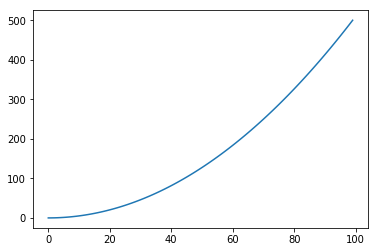

In [506]:
plt.plot(alfa)

In [438]:
Szilard(x)

0.8466460965681695 0.1532924678972881


0.991830867702232

NameError: name 'c1' is not defined